# Introduction to Data Science - Homework 2

Due: Monday, May 3 2020, 11:59pm.

In this homework you will scrape (a) a wikipedia page and (b) github repositories and organize the information in a Pandas dataframe. 

## Your Data
First Name: Mor
<br>
Last Name: Ofir
<br>
E-mail: morofir92@gmail.com
<br>
UID: 
<br>

In [1]:
    # imports and setup 
    from bs4 import BeautifulSoup
    # you can use either of these libraries to get html from a website
    import time
    import os

    import pandas as pd
    import scipy as sc
    import numpy as np

    import statsmodels.formula.api as sm

    import matplotlib.pyplot as plt 
    plt.style.use('ggplot')
    %matplotlib inline  
    plt.rcParams['figure.figsize'] = (10, 6) 

    # where the data is stored

### 0. Wikipedia scraping
Write a script that crawls a random wikipedia using this url: https://en.wikipedia.org/wiki/Special:Random (https://en.wikipedia.org/wiki/Special:Random). Once the page is downloaded it prints the name of the wikipedia entry, the date when it was last modified and the categories the page belongs to. If no categories are available it prints a message of "no categories available".

In [8]:
import requests
url1 =  "https://en.wikipedia.org/wiki/Special:Random"
req = requests.get(url1)
data = BeautifulSoup(req.content, "html.parser")

title = data.find('title').get_text()
print('Page title: ',title)
def checkCat(cat):
    if(cat):
        print(cat)
    else:
        print("no categories available.")
lastMod =data.find(id='footer-info-lastmod').get_text()
print(lastMod)
categories=data.find(id="mw-normal-catlinks").get_text(separator='\n')

checkCat(categories)


Page title:  Sayf al-Din Ghazi II - Wikipedia
 This page was last edited on 9 February 2020, at 12:40 (UTC).
Categories
: 
1180 deaths
Zengid emirs of Mosul
Muslims of the Crusades
12th-century deaths from tuberculosis
12th-century monarchs in the Middle East


### 1. Scrape Github Repository List using BeautifulSoup
In this part you will explore Github repositories, specifically the 100 most-starred repositories. You are going to scrape data from [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms and services or similar pages of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your solution:**


from https://help.github.com/en/github/site-policy/github-acceptable-use-policies
You may scrape the website for the following reasons:

Researchers may scrape public, non-personal information from the Service for research purposes, only if any publications resulting from that research are open access.
Archivists may scrape the Service for public data for archival purposes.
You may not scrape the Service for spamming purposes, including for the purposes of selling User Personal Information (as defined in the GitHub Privacy Statement), such as to recruiters, headhunters, and job boards.

### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved all the html files in the [data](data) folder (you can find it in Lecture 5 moodle section - the file is named data.zip, copy it to your folder where the notebook is, and extract it there). You will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder you will find first 10 pages of highly starred repositories saved as `searchPage1.html`,`searchPage2.html`,`searchPage3.html` ... `searchPage10.html`

Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 
 
We recommend that you create a single soup using BeautifulSoups' [append()](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#append) function.

In [9]:
listOfData =["searchPage1.html","searchPage2.html","searchPage3.html","searchPage4.html","searchPage5.html",
"searchPage6.html","searchPage7.html","searchPage8.html","searchPage9.html","searchPage10.html"]
soupFile=list()
for i in range(10):
    gitHubSoup=BeautifulSoup(open(listOfData[i],encoding="utf8"),"html.parser")
    soupFile.append(gitHubSoup)
    #htmlSoupList this contains all html of 10 pages


### 1.3. Extract Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

1. Name of the repository
+ Number of contributors 
+ Programming language used 
+ Number of stars 
+ Number of issues
+ Number of forks
+ Length of readme file.

Note that you will first have to extract links from the soup that you just scraped earlier. When you extract the link for the repository it will be a path to the stored html page for the repository. You will use this path to read the file and extract the above information.

Refer to the scraping lecture for details on how to do this. We recommend you use the web inspector to identify the relevant structures. 

Save the dataframe you created to a new file `project_info.csv` and ***include this in your submission***. You will loose points if you don't.

In [10]:
#the list looks like: [searchPage1.html, searchPage2.html, searchPage3.html,..., searchPage10.html]
#create list for every column
path = list()
repositoryName = list()
contributorsNum = list()
langList = list()
starsNum = list()
issuesNum = list()
forksNum = list()
readmeLen = list()


for i in range(10):
#find all names and href to pages 
    for link in soupFile[i].find_all("a",{"class":"v-align-middle"},href=True):
        path.append(link['href'])
        #repositoryName containg all the names of all 10 pages we opened
        repositoryName.append(link.get_text(strip=True))
        
    for lang in soupFile[i].find_all('div',attrs= {"class":"text-gray flex-auto min-width-0"}):
        #get all the prog languages from the main page
        langList.append(lang.get_text(strip=True))
             
length = len(path) #100
     
for j in range(length):
    soup2 = BeautifulSoup(open(path[j],encoding="utf8"), "html.parser") #opens all the DATAPATH
    
    temp = soup2.find_all('span',attrs= {"class":"num text-emphasized"})
    contributorsNum+=[temp[3].get_text().strip()]
    
    temp = soup2.find_all('span',attrs= {"class":"num text-emphasized"})
    starsNum+=[temp[1].get_text().strip()]
    
    
    temp = soup2.find_all(attrs= {"class":"Counter"})
    issuesNum+=[temp[0].get_text().strip()]
    
   
    temp = soup2.find(attrs= {"class":"Box-body p-6"})
    readmeLen+=[(temp.get_text())] #get all the text from readme section, after that i'll count this section
    
    temp = soup2.find_all(attrs= {"class":"social-count"})
    forksNum+=[temp[2].get_text().strip()]


namess=[]
for aa in repositoryName:
    namess+=[aa]
cont=[]
for a in contributorsNum:
    cont+=[a]
star=[]
for b in starsNum:
    star+=[b]
fork=[]    
for c in forksNum:
    fork+=[c]
read=[]    
for d in readmeLen:
     read.append(len(d)) #count the readme section only

df1 = pd.DataFrame()
df1['Name of the repository'] = namess
df1['Number of contributors'] = cont
df1['Programming language used'] = langList
df1['Number of stars'] = star
df1['Number of issues'] = issuesNum
df1['Number of forks'] = fork
df1['Length of readme file'] = read
#print(df1)
#Creating the csv file (7*100)
df1.to_csv(r'C:\Users\Mor\Desktop\Pythonpages\data\project_info.csv',index = False)

         Name of the repository Number of contributors  \
0     freeCodeCamp/freeCodeCamp                  3,155   
1                twbs/bootstrap                  1,060   
2                     vuejs/vue                    260   
3                facebook/react                  1,281   
4         tensorflow/tensorflow                  1,835   
..                          ...                    ...   
95  spring-projects/spring-boot                    541   
96        necolas/normalize.css                     35   
97               rust-lang/rust                  2,309   
98         storybooks/storybook                    588   
99                x64dbg/x64dbg                     66   

   Programming language used Number of stars Number of issues Number of forks  \
0                 JavaScript               2              350          20,915   
1                 JavaScript              23              275          64,021   
2                 JavaScript              29              17

### 2. Analyzing the repository data

In this part, you will analyze the data collectd. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. **We need you to do this so that we can run your code below without having to run your scraping code, which can be slow.**

In [11]:
data = pd.read_csv("project_info.csv")

### 2.1. Reformat the data into useful datatypes

1. Print the data types for the columns of your dataframe
+ Reformat the colums Issues, Forks, Stars, and Contributers to be integer data
+ There is one repository flagged as having infinite contributers (the Linux kernel). We'll assume that it in fact has 15000 contributors (about twice as much as the next project). 

In [12]:
print(data.dtypes)
data['Number of issues']  = data['Number of issues'].astype(str).str.replace(',', '')
data['Number of issues'] = data['Number of issues'].astype(int)

data['Number of forks']  = data['Number of forks'].astype(str).str.replace(',', '')
data['Number of forks'] = data['Number of forks'].astype(int)

#data['Number of stars']  = data['Number of stars'].str.replace(',', '')<--no commas here
data['Number of stars'] = data['Number of stars'].astype(int)

data['Number of contributors']  = data['Number of contributors'].astype(str).str.replace(',', '')
data['Number of contributors']  = data['Number of contributors'].str.replace('∞','15000')#inf is 15000
data['Number of contributors'] = data['Number of contributors'].astype(int)
print(data.dtypes) #to see if it realliy changed

Name of the repository       object
Number of contributors       object
Programming language used    object
Number of stars               int64
Number of issues             object
Number of forks              object
Length of readme file         int64
dtype: object
Name of the repository       object
Number of contributors        int32
Programming language used    object
Number of stars               int32
Number of issues              int32
Number of forks               int32
Length of readme file         int64
dtype: object


### Task 2.2 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

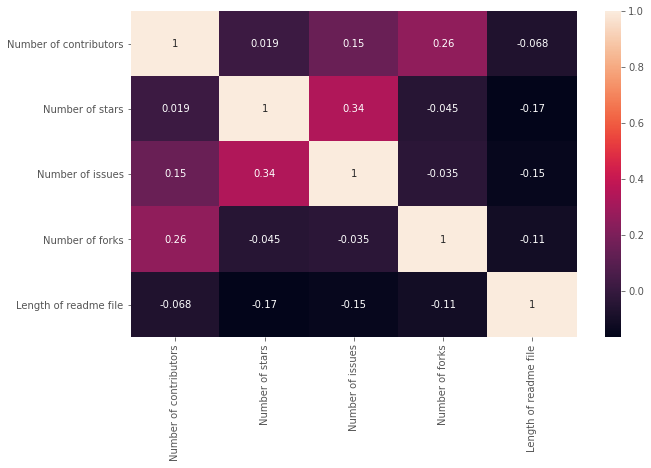

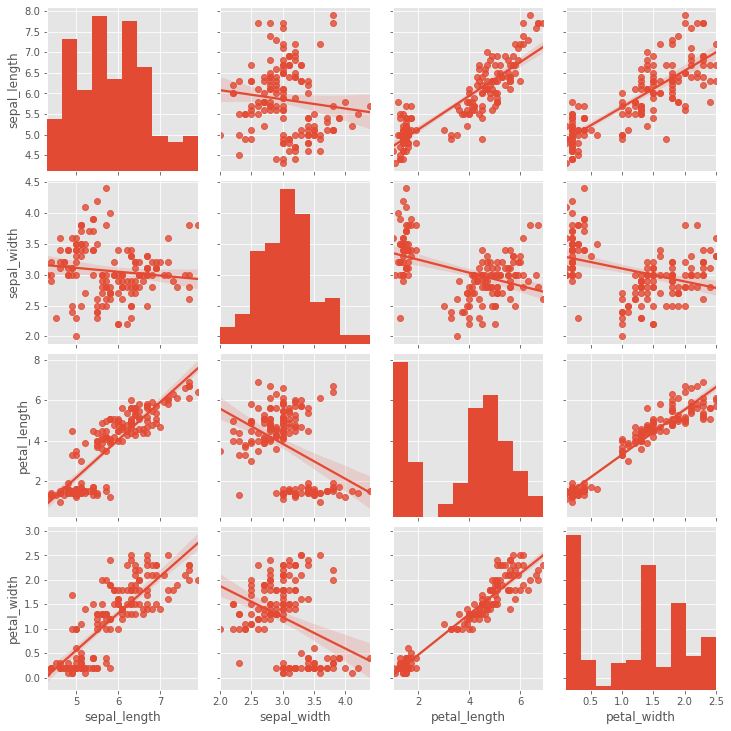

In [13]:
data.describe()
data.corr()
import seaborn as sns
heatmap1 = sns.heatmap(data.corr(), annot=True)

data = sns.load_dataset('iris')
 
# with regression
sns.pairplot(data, kind="reg")
plt.show()


**Your Interpretation:** in the class we didnt learn about heat maps or scatterplot matrix (זאת שאלת בחירה)


But my interpretation is about the heat map is used to see a corelation between columns and its allow us, the researches to find out about future predition and check how system and data will work in one condition or other.
its also helping us to see if there isnt correlation at all, depending on the work we are doing, in order we dont assume wrong conclusions.
i know it's also used in web pages in order to see which part are users focusing in order to analyze and make websites more approachable. 